<a href="https://colab.research.google.com/github/ashnapradhan/CS105/blob/main/MiniProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# What Factors Affect Student Sleep Patterns
Team members: Risa Onishi, Ashna Pradhan, Haru Sakamoto, Sazen Shakya


## 1. What data do you have?
We have survey data collected from 255 students enrolled in CS105, CS111, and/or CS010C via the CS105 mini project survey. The following data is what we would like to observe:


*   Average hours of sleep per day
*   Hours needed to feel rested
*   Caffeinated drink intake per day (oz)
*   Number of times you gym per week
*   Average hours spent on hobbies per week
*   Overall mental health
*   Average energy level throughout the day
*   How tired you feel when waking up





## 2. What would you like to know?
We would like to see what patterns there are between the lifestyle of students and the amount of sleep that they get. Specifically, we would like to evaluate how going to the gym, consumption of caffeinated drinks, and hours spent on hobbies are correlated. We can obtain these relationships by visualizing the data we have in different ways. This study holds significance as there are many factors that may impact the amount of sleep a UCR student obtains. We aim to determine which specific factors have an influence on sleep and the extents of such influences.

In [ ]:
import pandas as pd
import io
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('CS105 F24 Mini-Project Survey (Responses) - Form Responses 1.csv')

In [ ]:
hours_sleep = 'How many hours of sleep do you get on average during college?'
gym = 'How many times do you go to the gym per week on average?'
drink_intake = 'What is your daily caffeinated drink intake?\n(For reference, a "small" Red Bull is 8.4oz and "medium" Starbucks Grande is 16oz)'
hours_rested = 'How many hours of sleep do you need to feel rested? '
hobby = 'Approximately how many hours a week on average do you spend on these hobbies/this hobby now during college?'
mental_health = 'Rate your overall mental health.'
energy = 'On average, how would you describe your energy levels throughout the day? '
tired = 'How tired do you usually feel when waking up?'
main_df = df[[hours_sleep,gym,drink_intake,hours_rested,hobby,mental_health, energy, tired]]

In [ ]:
# Cleaning 'Approximately how many hours a week on average do you spend on these hobbies/this hobby now during college?' column
# Compute average of ranges, extract only numbers from data containing words, and fill any NaN with median
import re
def convert_to_float(value):
    try:
        return float(value)
    except ValueError:
        if "-" in value:
            parts = value.split("-")
            if len(parts) == 2:
                try:
                    num1 = float(parts[0])
                    num2 = float(parts[1])
                    return (num1 + num2) / 2
                except ValueError:
                    return float('nan')
            else:
                return float('nan')
        else:
            match = re.search(r'\d+(\.\d+)?', str(value))
            if match:
                return float(match.group())
            else:
                return float('nan')

main_df.loc[:, hobby] = main_df[hobby].apply(convert_to_float)
median = main_df[hobby].median()
main_df.loc[:, hobby] = main_df[hobby].fillna(median)

# Adding column showing 0 or 1 based on if the student gets enough sleep
main_df.loc[:, 'enough_sleep'] = 0

def convert_sleep_hours(hours_str):
  if "-" in hours_str:
    parts = hours_str.split("-")
    if len(parts) == 2:
        num1 = float(parts[0])
        num2 = float(parts[1].split()[0])
        return (num1 + num2) / 2
    else:
      return float('nan')

main_df.loc[:, 'sleep_hours_num'] = main_df[hours_sleep].apply(convert_sleep_hours)

def convert_rested_hours(hours_str):
  if hours_str == "More than 10 hours":
    return 10.0
  elif hours_str == "Less than 5 hours":
    return 4
  elif "-" in hours_str:
    parts = hours_str.split("-")
    if len(parts) == 2:
        num1 = float(parts[0])
        return num1
    else:
      return float('nan')

main_df.loc[:, 'hours_rested_num'] = main_df[hours_rested].apply(convert_rested_hours)
main_df.loc[:, 'enough_sleep'] = (main_df['sleep_hours_num'] >= main_df['hours_rested_num']).astype(int)


<ipython-input-126-ac1c7a60098c>:28: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  main_df.loc[:, hobby] = main_df[hobby].fillna(median)
<ipython-input-126-ac1c7a60098c>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_df.loc[:, 'enough_sleep'] = 0
<ipython-input-126-ac1c7a60098c>:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/i

**3. Explore, present, and analyze the data**

**Pie Chart:** We can use a pie chart to evaluate the differences between the distributions of how many hours of sleep students get on average versus how many hours they need to feel rested. This evaluation holds significance as it can help determine if UCR students are getting enough sleep to feel rested. A pie chart can be used for this as it can display percentages and allow for comparisons of the distributions.

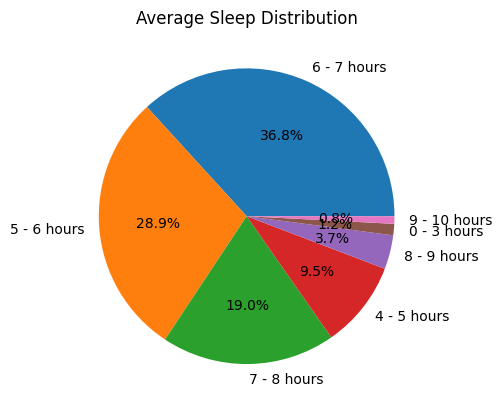

In [ ]:
# Pie chart for average hours of sleep
sleep_count = main_df[hours_sleep].value_counts()
pie = sleep_count.plot(kind='pie', autopct='%1.1f%%')
plt.title("Average Sleep Distribution")
pie.set_ylabel("")
plt.show()

The pie chart shows the distribution of the average hours of sleep students get. The data shows
 that most students (37%) tend to get 6-7 hours of sleep. There are also large percentages indicating
 that many students get around 5-6 or 7-8 hours of sleep. From this visualzation, it can be theorized
 that this data is normally distributed with most students obtaining 6-7 hours of sleep (the mean). It
 is also evident that a very small percentage of students get over 8 hours of sleep or under 3 hours
 of sleep.

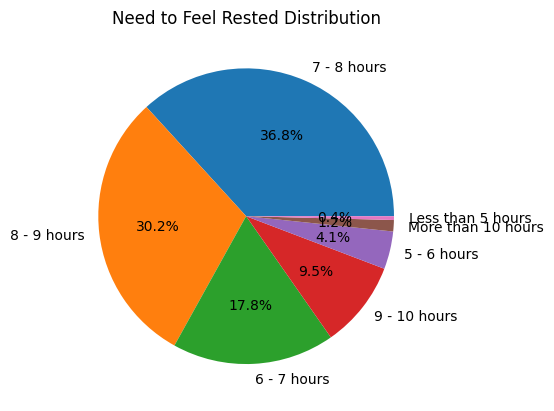

In [ ]:
# Pie chart for Hours needed to feel rested
rest_count = main_df[hours_rested].value_counts()
pieRest = rest_count.plot(kind='pie', autopct='%1.1f%%')
plt.title("Need to Feel Rested Distribution")
pieRest.set_ylabel("")
plt.show()

This pie chart shows the distribution of the amount of sleep that students need to get to feel rested.
 The chart shows that most students (36.8%) need around 7-8 hours of sleep to feel rested. From
 this visualzation, it can be theorized that this data is also normally distributed with most students
 needing 8-9 hours of sleep (the mean). Once again, there are also large percentages of the
 categories adjacent to the means (6-7 hours and 8-9 hours). With these two pie charts, we can
 theorize that to feel rested, students typically require more sleep in comparison to the hours of
 sleep they get on average.

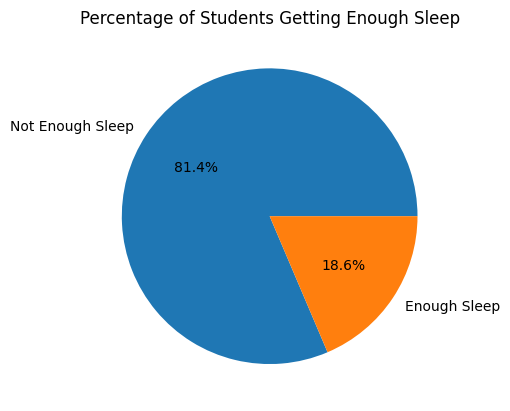

In [ ]:
enough_sleep_counts = main_df['enough_sleep'].value_counts()
plt.pie(enough_sleep_counts, labels=['Not Enough Sleep', 'Enough Sleep'], autopct='%1.1f%%')
plt.title('Percentage of Students Getting Enough Sleep')
plt.show()

This pie chart displays the percentage of people who get enough sleep, and the percent of people who do not. For instance, if a student states that they get an average of 4-5 hours of sleep, and they need need 9-10 hours to feel rested, then they do not get enough sleep to feel rested. The pie chart shows that an overwhelming amount of students do **not** get enough — only 18.6% of students get enough sleep to feel rested.

 **Bar Graph:** A bar graph can be utilized to display the proportion of students that get rnough rest
 versus those who do not. This information tells us if there is a likelihood of particular groups
 obtaining the amount of sleep they need over other groups. We can use a bar graph to display these
 proportions as we are attempting to evaluate categorical data

Text(0, 0.5, 'Proportion of Students Getting Enough Rest')

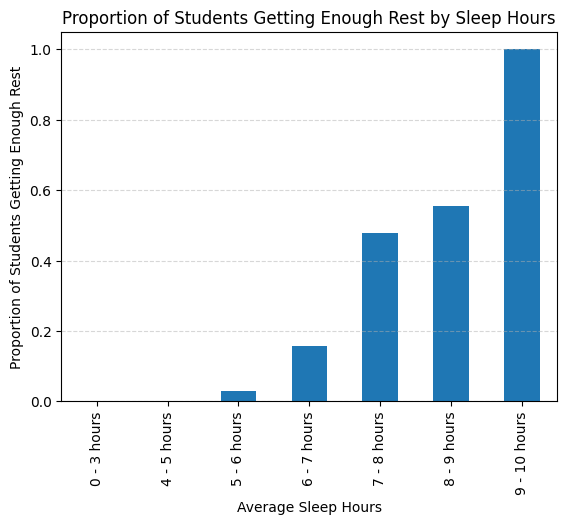

In [ ]:
proportion_enough = main_df.groupby(hours_sleep)['enough_sleep'].mean()

proportion_enough.plot(kind='bar')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.title('Proportion of Students Getting Enough Rest by Sleep Hours')
plt.xlabel('Average Sleep Hours')
plt.ylabel('Proportion of Students Getting Enough Rest')

 This bar chart shows the relationship between average sleep hours and the proportion of students who feel they get enough rest. It shows that as sleep duration increases, so does the proportion of students reporting enough rest. According to the bar graph, students who obtain 9-10 hours of sleep are more likely to obtain the amount of sleep they need to feel rested; 100% of students who get 9-10 hours of sleep are sleeping more than the hours they stated they need to feel rested. On the other hand, there are no students who feel rested after getting 5 or less hours of sleep on average. This goes to prove our original claim that students typically require more sleep in comparison to the hours of sleep they get on average

(<a list of 6 Line2D ticklines objects>,
 [Text(0.0, 0, 'Energy levels'),
  Text(2.0943951023931953, 0, 'Mental health'),
  Text(4.1887902047863905, 0, 'Tiredness When Waking Up')])

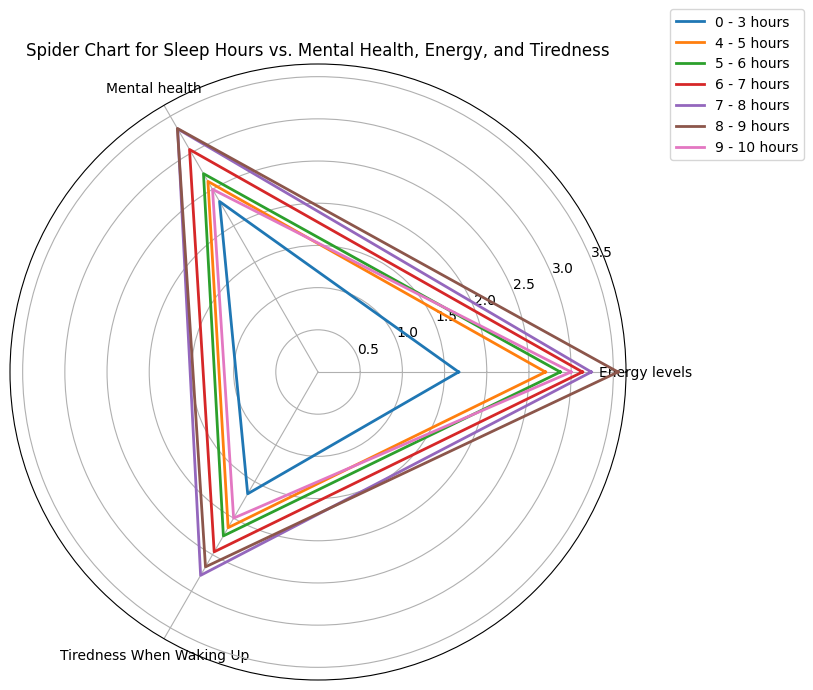

In [ ]:
sleep_hours_col = 'How many hours of sleep do you get on average during college?'
categories = ['Rate your overall mental health.', 'On average, how would you describe your energy levels throughout the day? ', 'How tired do you usually feel when waking up?']

grouped_data = main_df.groupby(sleep_hours_col)[categories].mean().reset_index()

grouped_data[sleep_hours_col] = grouped_data[sleep_hours_col].astype(str)

num_categories = len(categories)
angles = np.linspace(0, 2*np.pi, num_categories, endpoint=False)
angles = np.concatenate((angles, [angles[0]]))

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, polar=True)

for i, row in grouped_data.iterrows():
    values = row[categories].values.astype(float)
    values = np.concatenate((values, [values[0]]))  # Close the loop
    ax.plot(angles, values, linewidth=2, linestyle='solid', label=row[sleep_hours_col])

ax.set_thetagrids(np.degrees(angles[:-1]), categories)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.title("Spider Chart for Sleep Hours vs. Mental Health, Energy, and Tiredness")
ax.set_thetagrids(np.degrees(angles[:-1]),
                  ['Energy levels', 'Mental health', 'Tiredness When Waking Up'])

**Spider/Radar Chart:** A spider/radar chart can be used to display the relationship between the average hours of sleep a students gets and three factors: average energy level throughout the day, overall mental health rating, and tiredness when waking up. The chart shows that as sleep duration increases, scores for mental health, energy levels, and tiredness improve and stabalize. For example, those that get 0 - 3 hours of sleep have very low scores for the three factors while those that get 8 - 9 hours of sleep have a high overall score for the three factors.

Here, it is evident that the amount of sleep a student gets can influence other factors of their physical lifestyle. It can be observed that individuals who get more sleep have better mental health, greater energy levels, and feel less tired when waking up. This indicates a relationship between these factors and a differences in students who get less sleep versus more.

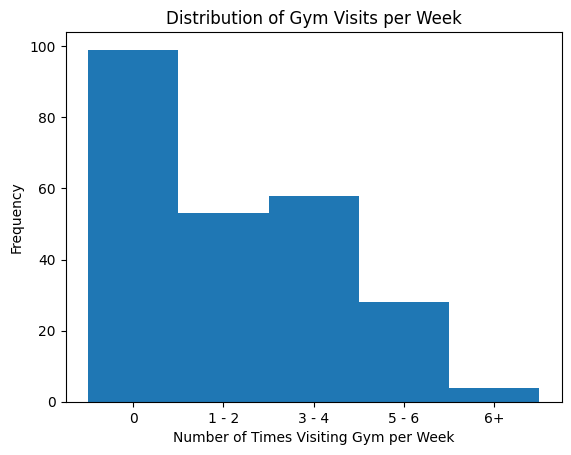

In [ ]:
# Histogram for numbers of times gym per week
main_df.loc[:, gym] = main_df.loc[:,gym].str.replace(' times', '').str.replace(', I don\'t go to the gym', '').str.replace('More than 6', '6+')
categories = ["0", "1 - 2", "3 - 4", "5 - 6", "6+"]
gym_count = main_df[gym].value_counts().reindex(categories)
gym_count.plot(kind='bar', width =1)
plt.xlabel("Number of Times Visiting Gym per Week")
plt.ylabel("Frequency")
plt.title("Distribution of Gym Visits per Week")
plt.xticks(rotation=0)  # Keep x-axis labels horizontal
plt.show()

**Histogram:** A histogram can be used to display the distribution of how many times UCR students visit the gym. This holds significance because the number of times a student visits the gym can influence their sleeping patterns. We used a histogram for this data as it can showcase the frequency of visits in accordance to the number of visits, which is continuous data.

 The histogram shows the distribution of people that visit the gym for a certain amount of days. It
 highlights that around half of the students do not visit the gym, while the other half visits the gym at
 least once a week. The visualization also shows the decline in frequency as the number of gym
 visits increases, indicating that the data is skewed to the right. We can deduce that for this survey
 sample, visiting the gym is not a high priority for most individuals. It is possible that the number of
 times an individual visits the gym can be in uenced by external factors such as hobbies or
 courseload

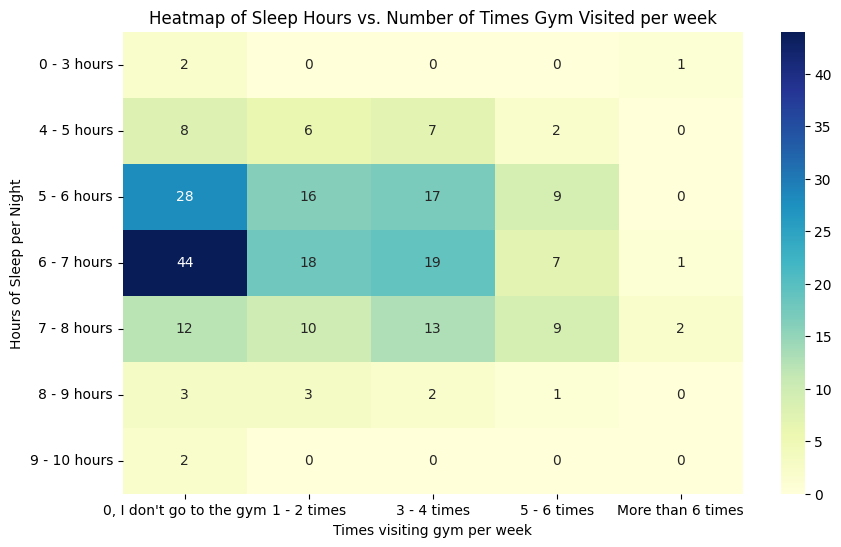

In [ ]:
# Heatmap for Sleep Hours vs Times Exercised per Week
pivot_data = df.pivot_table(index=hours_sleep, columns=gym, aggfunc='size', fill_value=0)

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_data, cmap='YlGnBu', fmt='d', annot=True)
plt.xlabel('Times visiting gym per week')
plt.ylabel('Hours of Sleep per Night')
plt.title('Heatmap of Sleep Hours vs. Number of Times Gym Visited per week')
plt.show()


**Heat Map:** We can implement a heat map to further evaluate the frequencies of UCR students visiting the gym. This information can contribute to the study as it can present relationships between gym routines and the hours of sleep a student gets on average. A heat map was used for this data as it can visualize the patterns between gym visits and sleep. The spread of the data can be seen shifting towards more hours of sleep as students visit the gym more time a week.

The heat map shown above displays the distribution of the amount of times students go to the gym
 per week and how much sleep they get on average. As depicted in the heat
 map, the darkest cell of the map indicates that 45 students obtain 6-7 hours of sleep on average
 and never visit the gym. Considering the next darkest cells are the ones closest to the darkest cell, a
 clear relationship between the two variables can be established

Text(0.5, 0, 'Caffeinated Drink Intake (Oz)')

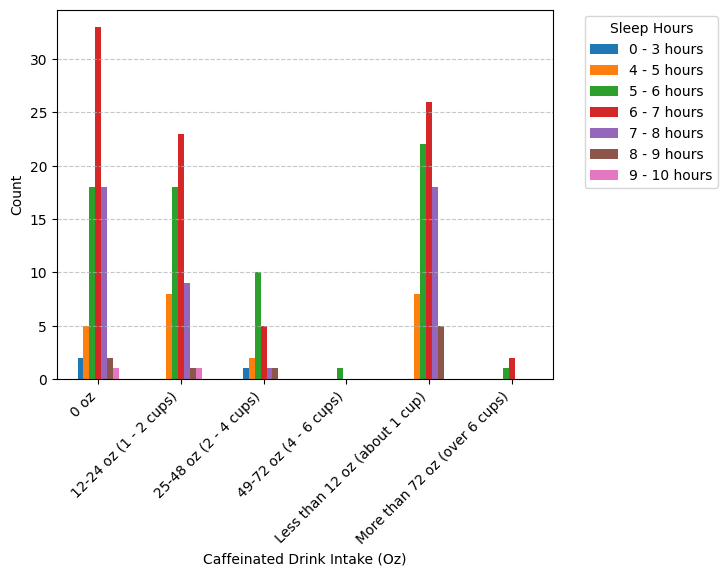

In [ ]:
# BAR GRAPH
cross_tab = pd.crosstab(df[drink_intake],df[hours_sleep])
caffeine_sleep = cross_tab.plot(kind='bar')
caffeine_sleep.legend(title="Sleep Hours", bbox_to_anchor=(1.05, 1), loc='upper left')  # Adjust legend position
caffeine_sleep.grid(axis='y', linestyle='--', alpha=0.7)  # Grid lines
plt.xticks(rotation=45, ha='right')
caffeine_sleep.set_ylabel("Count")
caffeine_sleep.set_xlabel("Caffeinated Drink Intake (Oz)")

**Bar Graph:** A bar graph can be utilized to help visualize the relationship between the hours of sleep a student gets and the amount of caffeine they consume. Such information is valuable to this study because caffeine consumption can greatly affect one’s sleep. We chose to display this relationship with a bar graph because bar graphs can help present categorical data. We can see that those that don't drink or rarely drink energy drinks tend to get more sleep while those that drink energy drinks tend to get less sleep.


 This bar graph depicts most students obtain 6-7 hours of sleep on average and typically do not
 drink over 24oz of caffeine on a daily basis. The visualization displays how the majority of this
 population drink less than 12oz of caffeine. As the caffeine intake exceeds 49oz, there is a sharp
 decline in the count of students. Additionally, it is visible that the students that obtain the least
 amount of sleep also drink the least amount of caffeine. This is likely because they are more rested
 than the other students as we proved previously.

<ipython-input-135-6f5f15ecf4eb>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_df[hobby] = pd.to_numeric(main_df[hobby])


Text(0.5, 1.0, 'Sleep vs Hobby Scatter Plot')

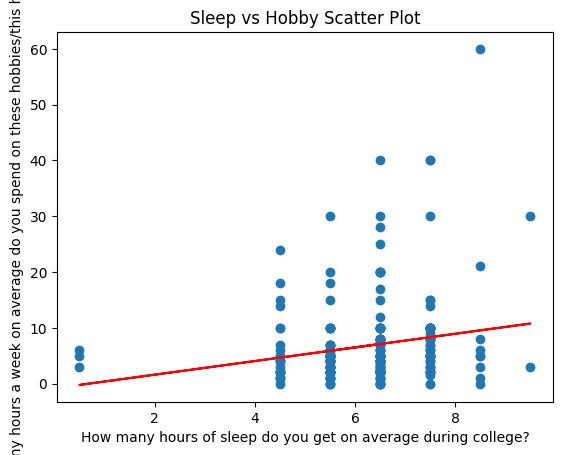

In [ ]:
sleep_hobby_df = main_df[[hours_sleep]].copy()
sleep_hobby_df[hours_sleep] = sleep_hobby_df[hours_sleep].str[:1].astype(float)
sleep_hobby_df[hours_sleep] += 0.5

main_df[hobby] = pd.to_numeric(main_df[hobby])
slope, intercept = np.polyfit(sleep_hobby_df[hours_sleep], main_df[hobby], 1)
line = slope * sleep_hobby_df[hours_sleep] + intercept

plt.scatter(sleep_hobby_df[hours_sleep], main_df[hobby])
plt.plot(sleep_hobby_df[hours_sleep], line, color='red')
plt.xlabel(hours_sleep)
plt.ylabel(hobby)
plt.title('Sleep vs Hobby Scatter Plot')

**Scatter Plot:** We can use a scatter plot to determine if the hours a student spends on hobbies can influence the average hours of sleep that they get. This information can contribute to the study as the amount of time a student has to spend on their interests can be associated with the amount of sleep they get. A scatter plot and line of best fit can be used for this data as this can give us information on any outliers and a general overview of the relationship.

Using the data displayed in the scatter plot, we can theorize that students who spend more hours a week on their hobbies also obtain more hours of sleep on average. One reasoning for this positive relationship may be that students who get more sleep have more free time, meaning they have more time to spend on their interests.

**4. Can you state any hypotheses or make predictions? Which tests can you apply to verify your hypothesis?**

- Our null hypothesis is that there is no correlation between the amount of exercise a student gets and the hours of sleep they get. Our alternative hypothesis is that there is a positive correlation between the two variables, and this is also our prediction. Since we are using categorical data for both variables, we will perform a Chi-Square test on our null hypothesis.

- Our null hypothesis is that there is no correlation between the amount of caffeinated drinks a student consumes and the hours of sleep they get. Our alternative hypothesis is that there is a negative correlation, and this is also our prediction. Again, we are using categorical data for both variables, so we will perform another Chi-Square test to determine whether or not to reject our null hypothesis.

- Our null hypothesis is that there is no correlation between the hours a student spends on hobbies and the hours of sleep they get. Our alternative hypothesis is that there is a negative correlation, and this is also our prediction. We have cleaned our data into numerical data, so we can perform a Pearson Correlation test on our null hypothesis.


**5. Test your hypotheses**

# Number of Times Gym Visited per Week and Sleep Hours

In [ ]:
from scipy.stats import chi2_contingency

gym_sleep_table = pd.crosstab(main_df[gym], main_df[hours_sleep])

chi2_stat, p_value, dof, expected = chi2_contingency(gym_sleep_table)
num_rows, num_columns = gym_sleep_table.shape
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")
print(f"Chi-square Statistic: {chi2_stat}, p-value: {p_value}, Degrees of Freedom: {dof}")

Number of rows: 5
Number of columns: 7
Chi-square Statistic: 37.329981848797985, p-value: 0.04055193605246252, Degrees of Freedom: 24


For this hypothesis, we utilized the Chi-Square test to determine whether or not the null hypothesis can be rejected. This test also helps determine if our variables are independent or dependent of each other. We calculated a Chi-Square value of 36.699 and degrees of freedom of 24. This is because there are 5 rows and 7 columns, so the degrees of freedom are (5−1) × (7−1)=24. Using the standard significance level of 0.05, we get a critical value of 36.415. Since 36.699 > 36.415, we reject our null hypothesis. Since the p-value of 0.047 is close to the alpha of 0.05, we reject the null with moderate confidence. There is sufficient evidence to conclude a significant relationship between the number of times the gym is visited and the hours of sleep a student gets, thus showing that both variables are not independent.

# Amount of Caffeine Drinks and Sleep Hours

In [ ]:
caffeine_sleep_table = pd.crosstab(main_df[drink_intake], main_df[hours_sleep])

chi2_stat, p_value, dof, expected = chi2_contingency(caffeine_sleep_table)
print(f"Chi-square Statistic: {chi2_stat}, p-value: {p_value}, Degrees of Freedom: {dof}")

Chi-square Statistic: 24.698270789484422, p-value: 0.7395585218210357, Degrees of Freedom: 30


Once again, in this case, we used the Chi-Square test to determine whether we can reject the null hypothesis. Our Chi-Square value was 26.448 and the degrees of freedom was 30 as there was 6 rows and 7 columns. Using the standard significance level of 0.05, our critical value is 43.773. Since 26.448 < 43.773, we fail to reject our null hypothesis. The p-value of 0.652 is significantly larger than 0.05. Therefore, there is insufficient evidence to conclude a significant relationship between the amount of caffeine intake and the hours of sleep a student gets. This suggests that these two variables are independent.



# Hours spent on Hobbies and Sleep Hours

In [ ]:
from scipy.stats import pearsonr

correlation, p_value = pearsonr(sleep_hobby_df[hours_sleep], main_df[hobby])
print(f"Pearson Correlation: {correlation}")
print(f"p-value: {p_value}")

Pearson Correlation: 0.19382649777718522
p-value: 0.0024585873048118953


With this hypothesis, we can use the Pearson Correlation test. The Pearson Correlation measures the degree to which a set of data points forms a straight-line relationship. Through this test, we can not only determine whether to reject our null hypothesis but also calculate the strength of the correlation, if any exists. The p-value we found was 0.0018, which is significantly less than the standard significance level of 0.05. Therefore, since our p-value is less than our significance level, we can reject our null hypothesis, showing that there is a significant relationship between the hours spent on hobbies and the amount of sleep a student gets. However, since our Pearson Correlation value is 0.195, the strength of the correlation is weak.

**6. Draw the overall conclusion**

In conclusion, through our analysis, we explored patterns and correlations between exercise, caffeine intake, hobbies, hours of sleep needed to feel rested, and hours of sleep obtained during college among UCR students. By creating various visualizations for the data, we found mixed results. Our chi-squared and pearson correlation tests revealed correlations in two out of three of our hypotheses. However, both of the hypotheses are weakly correlated. In regards to the relationship between the hours of sleep a student gets and the hours they spend on hobbies, there exists a positive correlation as proven by our visualizations and the Pearson Correlation test. As we evaluated the data regarding the number of times a student visited the gym and the hours of sleep they received, a relationship was found upon analysis of the visualization and Chi-Square test. When it comes to finding a relationship between caffeine consumption and the amount of sleep students receive, a relationship can not be established as the p-value of 0.65 is significantly greater than 0.05. This is in opposition to our original hypothesis of the two variables having a negative correlation. Despite this, our findings provide a primitive understanding of some key factors that influence the amount of sleep a student gets.


**Contributions:**

Sazen Shakya: Created and analyzed heat map visualization for gym visit vs sleep hours. Performed and drew conclusions on Chi-Square and Pearson Correlation tests.

Risa Onishi: Created 2 pie charts, bar chart for students getting enough sleep, bar chart showing sleep hours vs caffeine intake, and corresponding data cleaning. Revised answers written by groupmates.

Ashna Pradhan: Created pie charts, devised descriptions and analysis of all visualizations, revised #2

Haru Sakamoto: Created spider chart and histogram, and cleaned the hobbies column. Answered #1 and #2 and revised asnwers.